In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/WineQT.csv')
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = dataframe.drop(columns='quality', axis=1)
y = dataframe['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True)


In [ ]:
X_sample = X_test #sampleData.drop(columns='quality', axis=1)
y_sample = y_test #sampleData['quality']
sampleModel = DecisionTreeClassifier()
sampleModel.fit(X_sample, y_sample)
from sklearn import tree
plt.figure(figsize=(8, 8))
tree.plot_tree(sampleModel, filled=True)

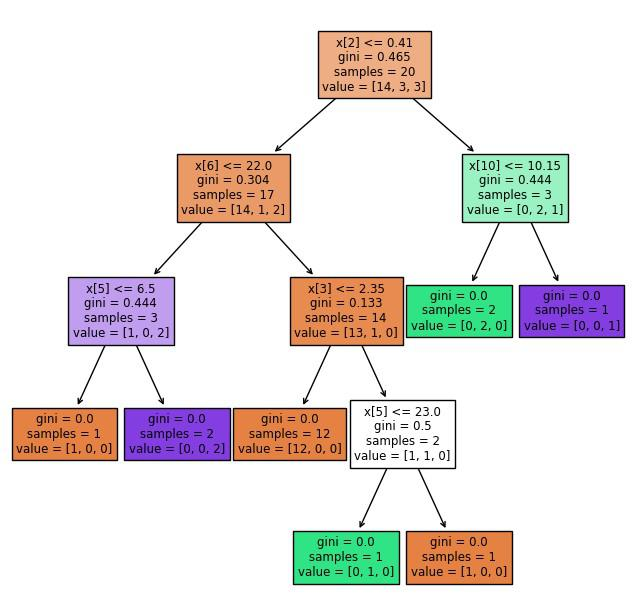

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
predictions = svm_classifier.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


random_search = RandomizedSearchCV(svm_classifier, param_grid, cv=5)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
print(best_params_random)

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 1}


In [ ]:
svm_classifier_optimizedparams = SVC(C=1, gamma='scale', kernel='rbf', degree=2)
svm_classifier_optimizedparams.fit(X_train, y_train)
score = svm_classifier_optimizedparams.score(X_test, y_test)
print(f'Optimized SVM Test Accuracy: {score}')

Optimized SVM Test Accuracy: 0.6200873362445415


Using the optimized parameters (C=1, gamma='scale', kernel='rbf', degree=2), we fit the model and evaluate its accuracy on the test set.